<a href="https://colab.research.google.com/github/Murad734138/PRNG_DESIGN/blob/main/prng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

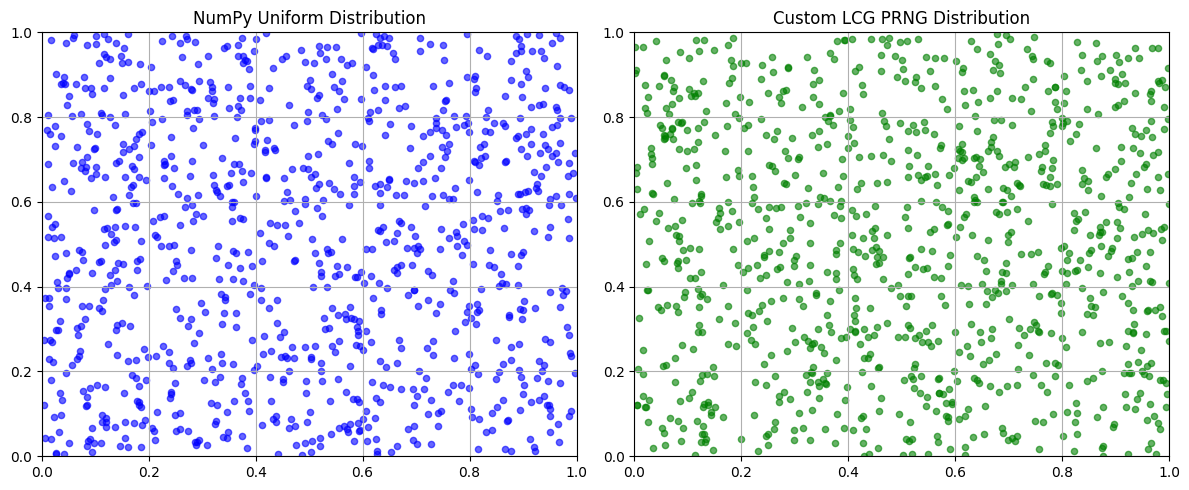

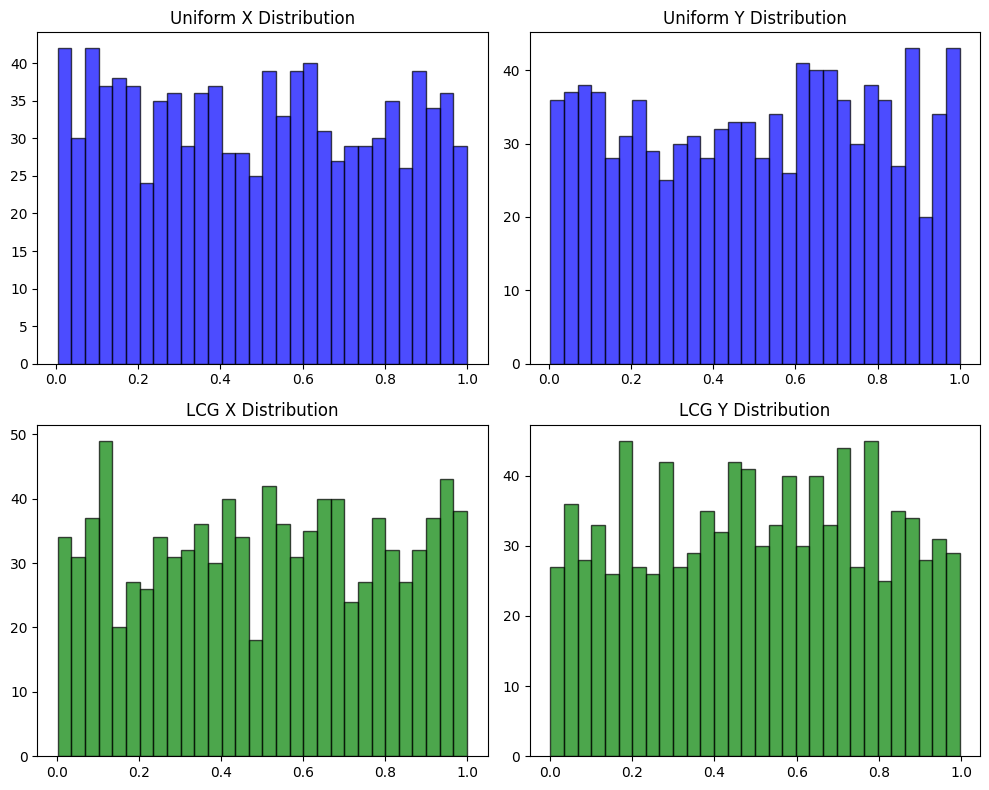

=== Distribution Statistics ===
Uniform - Mean X: 0.490, Std X: 0.292
Uniform - Mean Y: 0.507, Std Y: 0.292
LCG - Mean X: 0.508, Std X: 0.291
LCG - Mean Y: 0.502, Std Y: 0.280


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Custom Linear Congruential Generator ===
def lcg(modulus, a, c, seed, size):
    numbers = []
    x = seed
    for _ in range(size):
        x = (a * x + c) % modulus
        numbers.append(x / modulus)  # Normalize to [0, 1)
    return np.array(numbers)

# Parameters for LCG (common values)
modulus = 2**31
a = 1103515245
c = 12345
seed = 42
n_points = 1000

# Generate pseudorandom pairs using LCG
lcg_x = lcg(modulus, a, c, seed, n_points)
lcg_y = lcg(modulus, a, c, seed + 1, n_points)  # Different seed for variation

# Compare with numpy's built-in uniform distribution
np.random.seed(42)
uniform_x = np.random.uniform(0, 1, n_points)
uniform_y = np.random.uniform(0, 1, n_points)

# === Plot scatter distributions ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(uniform_x, uniform_y, alpha=0.6, s=20, color='blue')
ax1.set_title('NumPy Uniform Distribution')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.grid(True)

ax2.scatter(lcg_x, lcg_y, alpha=0.6, s=20, color='green')
ax2.set_title('Custom LCG PRNG Distribution')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.grid(True)

plt.tight_layout()
plt.savefig('t1.pdf')
plt.show()

# === Histograms to show distribution shapes ===
fig, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(10, 8))

ax3.hist(uniform_x, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax3.set_title('Uniform X Distribution')

ax4.hist(uniform_y, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax4.set_title('Uniform Y Distribution')

ax5.hist(lcg_x, bins=30, alpha=0.7, color='green', edgecolor='black')
ax5.set_title('LCG X Distribution')

ax6.hist(lcg_y, bins=30, alpha=0.7, color='green', edgecolor='black')
ax6.set_title('LCG Y Distribution')

plt.tight_layout()
plt.savefig('tt.pdf')
plt.show()

# === Statistics ===
print("=== Distribution Statistics ===")
print(f"Uniform - Mean X: {np.mean(uniform_x):.3f}, Std X: {np.std(uniform_x):.3f}")
print(f"Uniform - Mean Y: {np.mean(uniform_y):.3f}, Std Y: {np.std(uniform_y):.3f}")
print(f"LCG - Mean X: {np.mean(lcg_x):.3f}, Std X: {np.std(lcg_x):.3f}")
print(f"LCG - Mean Y: {np.mean(lcg_y):.3f}, Std Y: {np.std(lcg_y):.3f}")
